# Exemplo de análise de sentimentos usando o VADER

## Pacotes utilizados

* __LeIA__: fork do léxico e ferramenta para análise de sentimentos VADER adaptado para textos em português;
* __Pandas__: pacote/módulo para análise e manipulação de dados;
* __Numpy__: pacote/módulo para programação científica;
* __RE__: pacote/módulo para operações de correspondência de expressões regulares.

In [ ]:
# IMPORTANDO PACOTES

from leia.leia import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re

In [ ]:
# LENDO ARQUIVO JSON COM OS TWEETS

dados = pd.read_json(r'example_dataset.json')
dados.head()

In [ ]:
# renomeando nomes das colunas
dados.columns = ['id_tweet', 'nome', 'nome_conta', 'data_criacao', 'texto']
dados.head()

# Construção do dataset

O arquivo JSON com o dataset foi construído a partir da coleta dos tweets usando a Twitter API através da biblioteca Tweepy (https://www.tweepy.org).

In [ ]:
dados.info()

# Função para realizar a análise de sentimentos

* __SentimentIntensityAnalyzer__: classe usada para calcular uma pontuação de intensidade de sentimentos de determinado texto;
* __polarity_scores(text)__: retorna pontuações de intensidade do sentimento com base no texto de entrada.

In [ ]:
def realizar_analise_vader(text):
    analisador = SentimentIntensityAnalyzer()
    resultado = analisador.polarity_scores(text)

    return resultado

In [ ]:
resultado = realizar_analise_vader("Fico triste pela derrota do Santos!")
resultado

# Formato de retorno da função _polarity_scores_

* __neg__: probabilidade do sentimento do texto ser negativo;
* __neu__: probabilidade do sentimento do texto ser neutro;
* __pos__: probabilidade do sentimento do texto ser positivo;
* __compound__: valor composto normalizado que calcula a soma de todas as classificações para o texto, na escala de -1 a 1.

# Criando funções de pré-processamento de texto

* Removendo menções a usuários;
* Removendo links;
* Removendo números
* Removendo espaços em branco duplicados, e no início e final dos textos

In [ ]:
def remover_padrao(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt



def limpar_tweets(tweets):

    # remove mencoes a usuarios (@xxx)
    tweets = np.vectorize(remover_padrao)(tweets, "@[\w]*")

    # remove URL links (httpsxxx)
    tweets = np.vectorize(remover_padrao)(tweets, "https?://[A-Za-z0-9./]*")

    # remove numeros
    tweets = np.vectorize(remover_padrao)(tweets, "\d+")
    
    # remove espacos em branco duplicados
    tweets = [" ".join(t.split()) for t in tweets]
    
    # remove espacos em branco do inicio e do final da string
    tweets = [t.strip() for t in tweets]

    return tweets

In [ ]:
dados['texto_limpo'] = limpar_tweets(dados['texto'])

In [ ]:
dados.head()

In [ ]:
dados.iloc[5]['texto']

In [ ]:
dados.iloc[5]['texto_limpo']

# Determinando a polaridade

# 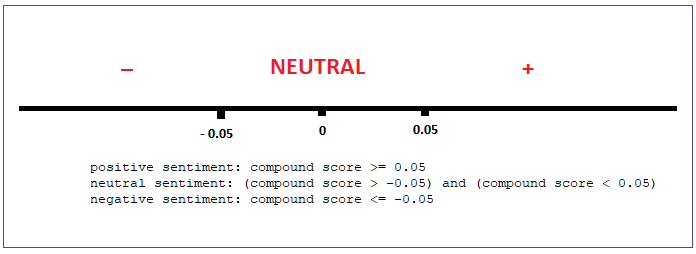

In [ ]:
def determinar_polaridade(text):
    resultado = realizar_analise_vader(text)

    if resultado['compound'] >= 0.05 :
        return "Positivo"

    elif resultado['compound'] <= -0.05 :
        return "Negativo"

    else:
        return "Neutro"

In [ ]:
dados['polaridade_vader'] = ""

In [ ]:
dados.head()

In [ ]:
dados['polaridade_vader'] = np.vectorize(determinar_polaridade)(dados['texto_limpo'])

In [ ]:
dados.head()

In [ ]:
dados.to_json("example_dataset_with_vader_polarities.json", orient="records")